<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 5: Data Processing & Cleaning for Data Science: Data Ingestion and Wrangling with Pandas

The purpose of this [Jupyter Notebook] is to getting you introduced to the Data Processing & Cleaning for Data
Science: Data Ingestion and Wrangling with Pandas. It provides a set of practical Training challenges that allow grasping the different concepts presented in the lecture 5.

## Challenge 1
1. Connect to the `chinook.db` sqlite3 database available in the folder data.
2. Find the genre names with the longest average song length.

`Hint:`
join the tables with the genre name and song length and use the SQLite aggregate
function for the average along with a GROUP BY clause.


In [ ]:
#Your Solution here
import sqlite3
import pandas as pd

conn = sqlite3.connect('data/chinook.db')
query = """SELECT g.Name AS Genre, AVG(t.Milliseconds) AS AvgLength
FROM genres g
JOIN tracks t ON g.GenreId = t.GenreId
GROUP BY g.Name;"""

result = pd.read_sql_query(query, conn)
print(result)

                 Genre     AvgLength
0     Sci Fi & Fantasy  2.911783e+06
1      Science Fiction  2.625549e+06
2                Drama  2.575284e+06
3             TV Shows  2.145041e+06
4               Comedy  1.585264e+06
5                Metal  3.097494e+05
6    Electronica/Dance  3.029858e+05
7          Heavy Metal  2.974529e+05
8            Classical  2.938676e+05
9                 Jazz  2.917554e+05
10                Rock  2.839100e+05
11               Blues  2.703598e+05
12         Alternative  2.640585e+05
13              Reggae  2.471778e+05
14          Soundtrack  2.443709e+05
15  Alternative & Punk  2.343538e+05
16               Latin  2.328593e+05
17                 Pop  2.290341e+05
18               World  2.249238e+05
19            R&B/Soul  2.200669e+05
20          Bossa Nova  2.195900e+05
21      Easy Listening  1.891642e+05
22         Hip Hop/Rap  1.781763e+05
23               Opera  1.748130e+05
24       Rock And Roll  1.346435e+05


## Challenge 2: Ingesting, Wrangling and Analyzing  iTune data

You've started a new data science position at the iTune department at Apple Company. 
The department wants to build, test, and evaluate new machine learning recommendation song models using a different source of data: in Excel file, in a csv file, and in the chinook.db SQLite database. They want you proceed with the data ingsestion and data wrangling procedures to provide a clean dataset to be used later for their machine learning based recommendation songs models.  

1. They particlarly asked you to load, clean, and analyze, and then deliver your results to the executive team and president.
You should deliver a small summary of your EDA work from pandas and save your cleaned and prepared data as a new Excel file. The data files are `chinook_data.xlsx`, `chinook_data.csv`, and `chinook.db` on the data folder existed within this notebook.

`Hint:`
1. Follow the procedures in Lecture 5 - Slides: 13-17 - For data ingestion (Data loading from different sources).

2. Follow and test the procedures in Lecture 5 - Slides:18-22 - For Basic Exploratory Data Analysis (EDA).

3. Follow and test the procedures in Lecture 5 - Slides:23-27 - For Basic Data Cleaning Operations.

4. To save your cleaned dataset in an excel file use the pandas built-in method: `pandas.DataFrame.to_excel`.


In [37]:
#Your Solution here
connection = sqlite3.connect('data/chinook.db')
cursor = connection.cursor()

query = """
SELECT
t.name as Track,
t.composer,
t.unitprice,
g.name as Genre,
a.title as Album,
r.name as Artist
FROM tracks t
JOIN genres g ON t.genreid = g.genreid
JOIN albums a ON t.albumid = a.albumid
JOIN artists r ON a.artistid = r.artistid;
"""

sql_df = pd.read_sql_query(query, connection)
csv_df = pd.read_csv('data/itunes_data.csv', sep=',', decimal='.')

print(sql_df)
print(csv_df)

                                                  Track  \
0               For Those About To Rock (We Salute You)   
1                                 Put The Finger On You   
2                                       Let's Get It Up   
3                                      Inject The Venom   
4                                            Snowballed   
...                                                 ...   
3498  Pini Di Roma (Pinien Von Rom) \ I Pini Della V...   
3499  String Quartet No. 12 in C Minor, D. 703 "Quar...   
3500               L'orfeo, Act 3, Sinfonia (Orchestra)   
3501  Quintet for Horn, Violin, 2 Violas, and Cello ...   
3502                                      Koyaanisqatsi   

                                       Composer  UnitPrice       Genre  \
0     Angus Young, Malcolm Young, Brian Johnson       0.99        Rock   
1     Angus Young, Malcolm Young, Brian Johnson       0.99        Rock   
2     Angus Young, Malcolm Young, Brian Johnson       0.99        Roc

                                     Track  \
0  For Those About To Rock (We Salute You)   
1                    Put The Finger On You   
2                          Let's Get It Up   
3                         Inject The Venom   
4                               Snowballed   

                                    Composer  Milliseconds     Bytes  \
0  Angus Young, Malcolm Young, Brian Johnson        343719  11170334   
1  Angus Young, Malcolm Young, Brian Johnson        205662   6713451   
2  Angus Young, Malcolm Young, Brian Johnson        233926   7636561   
3  Angus Young, Malcolm Young, Brian Johnson        210834   6852860   
4  Angus Young, Malcolm Young, Brian Johnson        203102   6599424   

   UnitPrice Genre                                  Album Artist  
0       0.99  Rock  For Those About To Rock We Salute You  AC/DC  
1       0.99  Rock  For Those About To Rock We Salute You  AC/DC  
2       0.99  Rock  For Those About To Rock We Salute You  AC/DC  
3       0.99  Rock  Fo

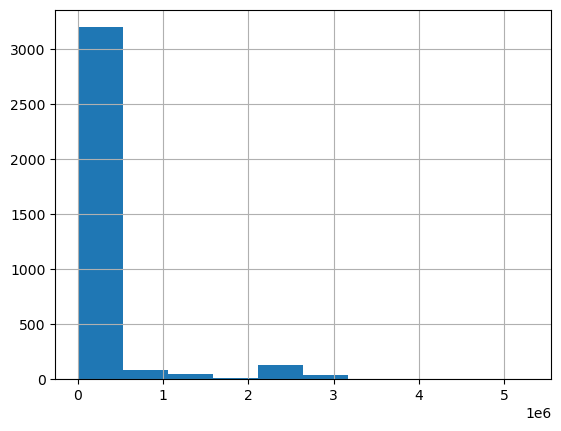

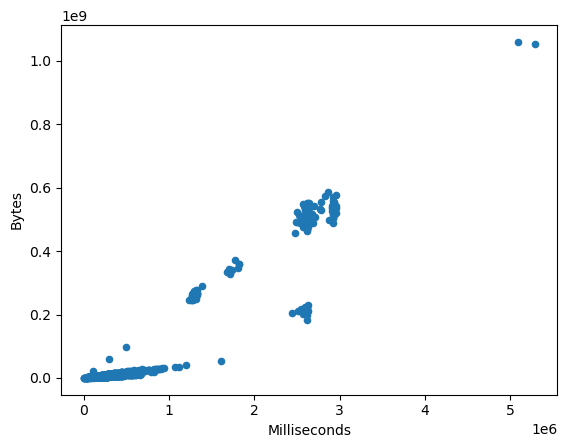

In [38]:
import matplotlib.pyplot as plt
print(csv_df.head())
print(csv_df.info())
print(csv_df.isna().sum())

print(csv_df.describe())
print(csv_df['Genre'].mode())
print(csv_df['Genre'].value_counts())

csv_df['Milliseconds'].hist()
plt.show()

csv_df.plot.scatter(x='Milliseconds',y='Bytes')

plt.show()

In [39]:
csv_df.drop('Composer', axis=1, inplace=True)
csv_df.columns

def remove_outliers_all(df):
    for column in df.select_dtypes(include=['number']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        upper_boundary = q3 + 1.5 * iqr
        lower_boundary = q1 - 1.5 * iqr
        df = df.loc[(df[column] >= lower_boundary) & (df[column] <= upper_boundary)]
    return df

print(remove_outliers_all(csv_df))

csv_df.drop_duplicates(inplace=True)
csv_df['Milliseconds'] = csv_df['Milliseconds'].astype('int')

csv_df['Seconds'] = csv_df['Milliseconds'] / 1000
csv_df['len_byte_ratio'] = csv_df['Milliseconds']/ csv_df['Bytes']

genre_dict = {'metal': 'Metal', 'met': 'Metal'}
csv_df['Genre'].replace(genre_dict)

csv_df['Genre'] = csv_df['Genre'].str.lower()
csv_df['Genre'] = csv_df['Genre'].str.upper()

                                                  Track  Milliseconds  \
0               For Those About To Rock (We Salute You)        343719   
1                                 Put The Finger On You        205662   
2                                       Let's Get It Up        233926   
3                                      Inject The Venom        210834   
4                                            Snowballed        203102   
...                                                 ...           ...   
3496                                    Erlkonig, D.328        261849   
3498  Pini Di Roma (Pinien Von Rom) \ I Pini Della V...        286741   
3499  String Quartet No. 12 in C Minor, D. 703 "Quar...        139200   
3501  Quintet for Horn, Violin, 2 Violas, and Cello ...        221331   
3502                                      Koyaanisqatsi        206005   

         Bytes  UnitPrice       Genre  \
0     11170334       0.99        Rock   
1      6713451       0.99        Rock   


In [40]:
csv_df.to_excel("cleaned_csv.xlsx")

## Challenge 3: Ingesting, Wrangling and Analyzing Bitcoin price data


You have just joined a financial company as a new data scientist. The company is  interested in the Bitcon market and you are working with a team that aims to ingest data and then clean, and analyse the final dataset to be used later to build and evaluate machine learning models for Bitcon Price forecasting.

The company is working with two datasets coming from two different sources and is only interested in the `BTCUSD` currency: 
1. One dataset is json file locally existed in the data folder: `bitcoin_price.json`. This file contains data up to `2020-11-27`
2. The other uses a real time data flow that comes from yahoo finance api service. The company wants to collect real time data beginning from `2020-11-28` to `2022-10-31`.

You are asked to do the required checklist procedures and operations to load, clean, and analyse, and then deliver your results to the executive team with providing a short summaray of your prelimanary EDA work from pandas and save the cleaner dataset as a new csv file. 
Note that the 

`Hint:`

1. To load a json file into a dataframe use the snipet code below:

```python
import json

with open('<path_to_your_json_file>') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)
```

This code uses the `json` built-in python module to open a json file and load it in an object data. Then we use the `from_dict()` pandas method to transform the json data into a DataFrame.

2. To get real time data flow from the yahoo finance api sevice we will use the `yfinance` module. 
    * So, first install the module in your environment using  `conda install yfinance`.
    * Then use the code below to get real data. Test with the periode from `2020-01-01` to `2024-10-31`.

```python
import yfinance as yf

btc_yf_df = yf.download('BTC-USD', # The currency we are intersted in
                   start='<start_date>', # The starting date
                   end='<end_date>', # The starting date
                   interval='1d' # The frequency of collecting the data. here 1 day
                  )
```

3. Get a look of the two DataFrames and see what are the common columns and what differ one to another.
    * You will notice that the  json DataFrame is indexed numericaly wherease the yahoo DataFrame is indexed by Date. So, you have to uniform the index for both DataFrames. In this case we will change the json DataFrame  index by Date.
        1. To do that, first rename the column `time` to `Date` by using the built-in pandas method: `rename()` as follows:
        
        ```python
        rename(columns ={'<old_col_name>':'<new_col_name>'}, inplace = True)
         ```
         
        2. What is the datatype of the new Date column in the json DataFrame?
            * You will notice that it is a `datetime64[ns]` datatype, which means the number of seconds since 1-1-1970. To make it date fomat like the yahoo DataFrame, convert the column to a pandas datetime datatype by using the following code: 
         
          ```python
              btc_df['<column_name>'] = pd.to_datetime(btc_df['<column_name>'], unit='ms')
          ```
         
        3. To change the index of your dataframe use the `set_index` built-in pandas function:
        ```python
              set_index('<column_name>', inplace=True)
        ```
            * The remaining common columns labels in both DataFrames are not uniformed. The json DataFrame uses lowercase strings,  while the yahoo DataFrame uses a first letter world uppercase string.
                  1. Change the column labels of the yahoo DataFrame to lowercase strings. Adjust the following code accordingly:
             ```python
                data_frame.columns= data_frame.columns.str.lower()
             ```
             
4. Concatenate the two dataframe into one dataset.
5. Do The basic EDA cheklist procedures on the resulting dataset:
   * Do few time series plots: 
       * open, close, high, low, volume with regards to Date
   * Print the correlation matrix.
6. Do the General Data Cleaning Checklist operations to see if ther is still cleaning operations to accomplish.
    * Most particularly, you will notice a NaN values in both `adj close` and `symbole` columns. What is your suggestion to deal with this missing values given that the company is not interest at all on the `adj close` data. 	
7. Save your cleaner dataframe into a csv file.
    * Use the `pandas.DataFrame.to_csv` method.
             

In [41]:
#Your Solution

import json
import yfinance as yf


with open('data/bitcoin_price.json') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)



btc_yf_df = yf.download('BTC-USD', # The currency we are intersted in
                   start='2020-01-01', # The starting date
                   end='2024-10-31', # The starting date
                   interval='1d' # The frequency of collecting the data. here 1 day
                  )




btc_df_jsn.rename(columns ={'time':'Date'}, inplace = True)


btc_df_jsn['Date'] = pd.to_datetime(btc_df_jsn['Date'], unit='ms')

btc_df_jsn.set_index('Date', inplace=True)

btc_yf_df.columns = btc_yf_df.columns.set_levels([level.str.lower() for level in btc_yf_df.columns.levels])

print(btc_df_jsn.head(2), '\n\n\n\n')
print(btc_yf_df.head(2))


[*********************100%***********************]  1 of 1 completed

            symbol   open    close       high       low       volume
Date                                                                
2013-03-31  btcusd  92.50   93.033   93.74999  91.00000  3083.079791
2013-04-01  btcusd  93.25  103.999  105.90000  92.49999  5224.401313 




Price                        adj close        close         high          low  \
Ticker                         btc-usd      btc-usd      btc-usd      btc-usd   
Date                                                                            
2020-01-01 00:00:00+00:00  7200.174316  7200.174316  7254.330566  7174.944336   
2020-01-02 00:00:00+00:00  6985.470215  6985.470215  7212.155273  6935.270020   

Price                            open       volume  
Ticker                        btc-usd      btc-usd  
Date                                                
2020-01-01 00:00:00+00:00  7194.89209  18565664997  
2020-01-02 00:00:00+00:00  7202.55127  20802083465  


In [42]:
combined_df = pd.concat([btc_df_jsn, btc_yf_df], axis=0)
print(combined_df)

                           symbol        open       close       high  \
Date                                                                   
2013-03-31 00:00:00        btcusd   92.500000   93.033000   93.74999   
2013-04-01 00:00:00        btcusd   93.250000  103.999000  105.90000   
2013-04-02 00:00:00        btcusd  104.000000  118.229354  118.38670   
2013-04-03 00:00:00        btcusd  117.958261  134.700000  146.88000   
2013-04-04 00:00:00        btcusd  134.716560  132.899000  143.00000   
...                           ...         ...         ...        ...   
2024-10-26 00:00:00+00:00     NaN         NaN         NaN        NaN   
2024-10-27 00:00:00+00:00     NaN         NaN         NaN        NaN   
2024-10-28 00:00:00+00:00     NaN         NaN         NaN        NaN   
2024-10-29 00:00:00+00:00     NaN         NaN         NaN        NaN   
2024-10-30 00:00:00+00:00     NaN         NaN         NaN        NaN   

                                 low        volume  (adj close,

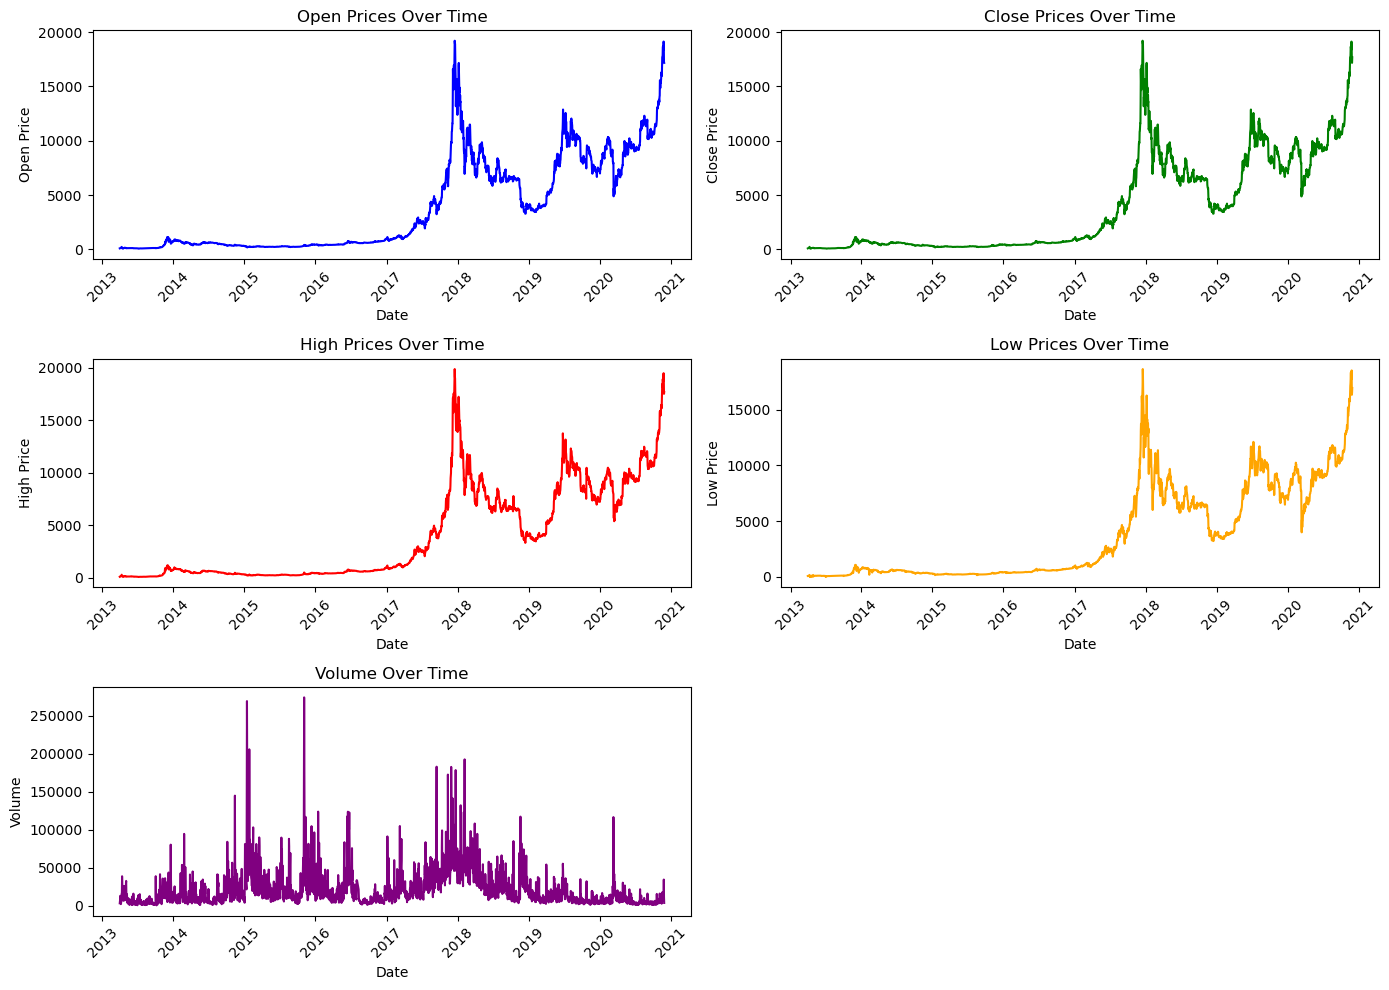

symbol                   object
open                    float64
close                   float64
high                    float64
low                     float64
volume                  float64
(adj close, btc-usd)    float64
(close, btc-usd)        float64
(high, btc-usd)         float64
(low, btc-usd)          float64
(open, btc-usd)         float64
(volume, btc-usd)       float64
dtype: object
                          open     close      high       low    volume  \
open                  1.000000  0.998120  0.999020  0.998306  0.057938   
close                 0.998120  1.000000  0.999100  0.998944  0.054514   
high                  0.999020  0.999100  1.000000  0.997788  0.070796   
low                   0.998306  0.998944  0.997788  1.000000  0.035311   
volume                0.057938  0.054514  0.070796  0.035311  1.000000   
(adj close, btc-usd)       NaN       NaN       NaN       NaN       NaN   
(close, btc-usd)           NaN       NaN       NaN       NaN       NaN   
(high, btc

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 
plt.figure(figsize=(14, 10))

 
plt.subplot(3, 2, 1)
plt.plot(combined_df.index, combined_df['open'], label='Open', color='blue')
plt.title('Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.xticks(rotation=45)

plt.subplot(3, 2, 2)
plt.plot(combined_df.index, combined_df['close'], label='Close', color='green')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

plt.subplot(3, 2, 3)
plt.plot(combined_df.index, combined_df['high'], label='High', color='red')
plt.title('High Prices Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.xticks(rotation=45)

plt.subplot(3, 2, 4)
plt.plot(combined_df.index, combined_df['low'], label='Low', color='orange')
plt.title('Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)
plt.plot(combined_df.index, combined_df['volume'], label='Volume', color='purple')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(combined_df.dtypes)

combined_df_numeric = combined_df.drop(columns=['symbol'])
correlation_matrix = combined_df_numeric.corr()
print(correlation_matrix)

In [ ]:
 # print(combined_df)
# combined_df.drop(columns=[('adj close', 'btc-usd')], inplace=True)
# combined_df.dropna(subset=['symbol'], inplace=True)

print(combined_df)


                     symbol          open         close         high  \
Date                                                                   
2013-03-31 00:00:00  btcusd     92.500000     93.033000     93.74999   
2013-04-01 00:00:00  btcusd     93.250000    103.999000    105.90000   
2013-04-02 00:00:00  btcusd    104.000000    118.229354    118.38670   
2013-04-03 00:00:00  btcusd    117.958261    134.700000    146.88000   
2013-04-04 00:00:00  btcusd    134.716560    132.899000    143.00000   
...                     ...           ...           ...          ...   
2020-11-24 00:00:00  btcusd  18364.000000  19131.000000  19400.00000   
2020-11-25 00:00:00  btcusd  19133.654712  18727.000000  19497.00000   
2020-11-26 00:00:00  btcusd  18726.475677  17211.695801  18908.00000   
2020-11-27 00:00:00  btcusd  17213.000000  17171.000000  17531.00000   
2020-11-28 00:00:00  btcusd  17171.000000  17686.840768  17705.00000   

                             low        volume  (close, btc-usd

In [57]:
combined_df.to_csv('cleaned_data_3.csv', index=True)